$\text{Chapter 2 Exercises}$

$\textbf{2.2: Bandit example}$

$\underline{\text{Question:}}$ 

Consider a $k$-armed bandit problem with $k = 4$ actions, denoted 1, 2, 3, and 4. Consider applying to this problem a bandit algorithm using $\varepsilon$-greedy action selection, sample-average action-value estimates, and initial estimates of $Q_1(a) = 0$, for all $a$. Suppose the initial sequence of actions and rewards is $A_1 = 1$, $R_1 = -1$, $A_2 = 2$, $R_2 = 1$, $A_3 = 2$, $R_3 = -2$, $A_4 = 2$, $R_4 = 2$, $A_5 = 3$, $R_5 = 0$. On some of these time steps the $\varepsilon$ case may have occurred, causing an action to be selected at random. On which time steps did this definitely occur? On which time steps could this possibly have occurred?



$\underline{\text{Answer:}}$ 

Based on the given data, the $Q_t(a)$ values are as follows:

$$\begin{align*}
t=1& \rightarrow \left[ 0, 0, 0, 0\right] \\
t=2& \rightarrow \left[ -1, 0, 0, 0\right] \\
t=3& \rightarrow \left[ -1, 1, 0, 0\right] \\ 
t=4& \rightarrow \left[ -1, -\frac{1}{2}, 0, 0\right] \\ 
t=5& \rightarrow \left[ -1, \frac{1}{3}, 0, 0\right] \\
\end{align*}$$

Therefore, at $t=1, 2, 3$, the $\epsilon$ case might have occurred, and at $t= 4, 5$ the $\epsilon$ case definitely occurred.

$\textbf{2.4: Step-size Derivation for } \alpha_n$

$\underline{\text{Question:}}$ 

If the step-size parameters, $\alpha_n$, are not constant, then the estimate $Q_n$ is a weighted average of previously received rewards with a weighting different from that given by (2.6). What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of the sequence of step-size parameters?

$\underline{\text{Solution:}}$

Assume $Q_{n+1}$ estimates the action value after the action is performed $n$ times. Starting from the same initial manipulations as the constant $\alpha$ case, we have

$$\begin{align*}
Q_{n+1} &= Q_n + \alpha_n (R_n - Q_n), \\
&= \alpha_n R_n + (1 - \alpha_n) Q_n,\\
&= \alpha_n R_n + (1 - \alpha_n) (\alpha_{n-1} R_{n-1} + (1 - \alpha_{n-1}) Q_{n-1}),\\
&= \alpha_n R_n + (1 - \alpha_n) \alpha_{n-1}R_{n-1} + (1 - \alpha_n) (1 - \alpha_{n-1}) Q_{n-1}, \\
&\dots \\
&= \sum_{i=1}^n \alpha_i R_i \prod_{j=i+1}^n (1-\alpha_j) + Q_1\prod_{i=1}^n (1-\alpha_i)
\end{align*}$$

$\textbf{2.5: Non-stationary Bandit }$

$\underline{\text{Question:}}$ 

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean 0 and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha = 0.1$. Use $\varepsilon = 0.1$ and longer runs, say of 10,000 steps.

$\underline{\text{Answer:}}$ 


In [ ]:
%pip install matplotlib numpy

In [34]:
NUM_STEPS = 10000
NUM_RUNS = 2000
k=10

In [43]:
import numpy as np
def run_non_stationary_sample_average(k, epsilon=0.1, alpha=None):
    all_rewards = np.zeros((NUM_RUNS, NUM_STEPS))
    all_action_choices = np.zeros((NUM_RUNS, NUM_STEPS))

    for run in range(NUM_RUNS):
        q_true = np.zeros(k)
        
        Q = np.zeros(k)
        N = np.zeros(k)

        for step in range(NUM_STEPS):
            if np.random.rand() < epsilon:
                action = np.random.randint(0, k)
            else:
                action = np.argmax(Q)
            
            reward = np.random.normal(loc=q_true[action], scale=1)
            all_rewards[run, step] = reward
            all_action_choices[run, step] += 1 if action == np.argmax(q_true) else 0

            N[action] += 1
            Q[action] += (reward - Q[action]) / (N[action] if not alpha else 1/alpha)

            q_true += np.random.normal(loc=0, scale=0.01, size=k)

    return all_rewards.mean(axis=0), all_action_choices.mean(axis=0)

In [44]:
import matplotlib.pyplot as plt

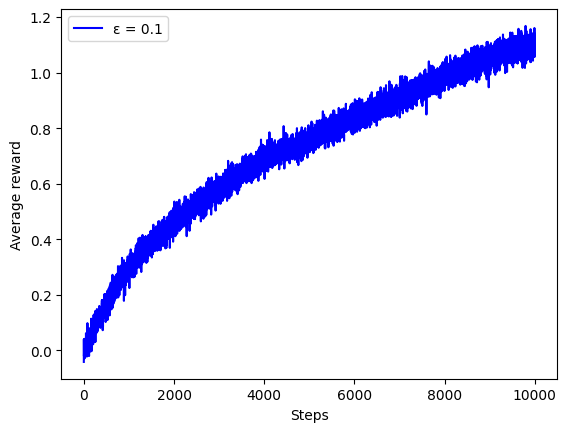

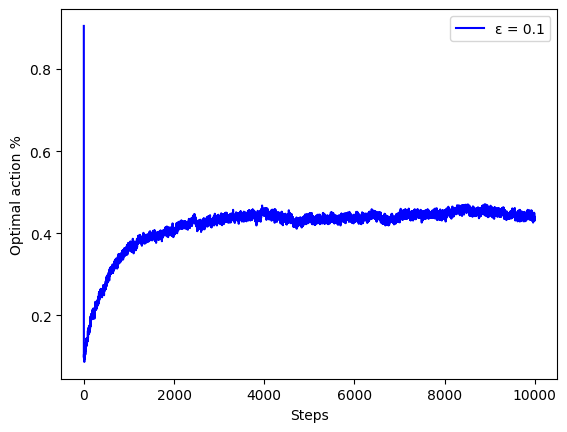

In [ ]:
# sample-averages method
for eps, color in [(0.1, 'blue')]:
    avg_rewards, avg_action_choices = run_non_stationary_sample_average(k, eps)
    label = f'ε = {eps}' if eps > 0 else 'ε = 0 (greedy)'

    # Plot average rewards
    plt.figure(1)
    plt.plot(avg_rewards, color=color, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    plt.legend()

    # Plot % optimal action taken
    plt.figure(2)
    plt.plot(avg_action_choices, color=color, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Optimal action %')
    plt.legend()


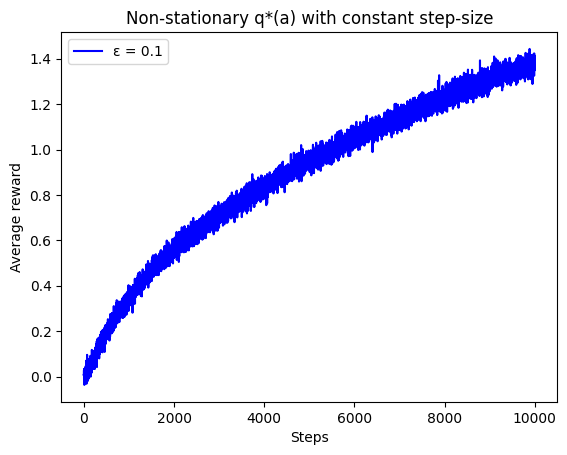

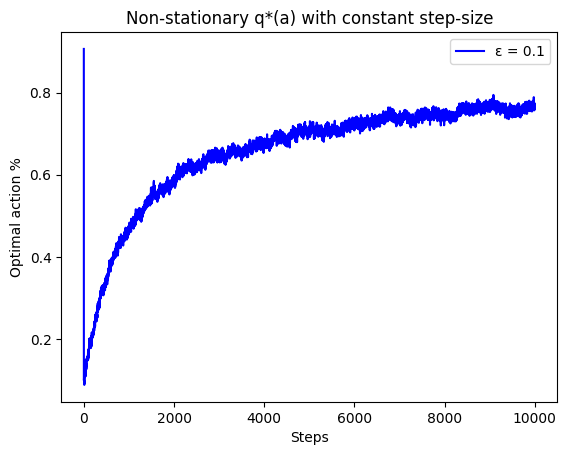

In [45]:
# constant step-size method

alpha = 0.1

for eps, color in [(0.1, 'blue')]:
    avg_rewards, avg_action_choices = run_non_stationary_sample_average(k, eps, alpha)
    label = f'ε = {eps}' if eps > 0 else 'ε = 0 (greedy)'

    # Plot average rewards
    plt.figure(1)
    plt.plot(avg_rewards, color=color, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    plt.title("Non-stationary q*(a) with constant step-size")
    plt.legend()

    # Plot % optimal action taken
    plt.figure(2)
    plt.plot(avg_action_choices, color=color, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Optimal action %')
    plt.title("Non-stationary q*(a) with constant step-size")
    plt.legend()


$\textbf{2.7: Unbiased Constant-Step-Size Trick}$

$\underline{\text{Question:}}$

In most of this chapter we have used sample averages to estimate action values because sample averages do not produce the initial bias that constant step sizes do (see the analysis leading to (2.6)). However, sample averages are not a completely satisfactory solution because they may perform poorly on nonstationary problems. Is it possible to avoid the bias of constant step sizes while retaining their advantages on nonstationary problems? One way is to use a step size of

\begin{equation}
\beta_n = \alpha/\bar{o}_n,\tag{2.8}
\end{equation}

to process the $n$th reward for a particular action, where $\alpha > 0$ is a conventional constant step size, and $\bar{o}_n$ is a trace of one that starts at 0:

\begin{equation}
\bar{o}_n = \bar{o}_{n-1} + \alpha(1 - \bar{o}_{n-1}), \quad \text{for } n > 0, \quad \text{with } \bar{o}_0 = 0.\tag{2.9}
\end{equation}

Carry out an analysis like that in (2.6) to show that $Q_n$ is an exponential recency-weighted average $\textit{without initial bias}$.

$\underline{\text{Answer:}}$

With step-size $\beta_n$, we have
$$\begin{align*}
Q_{n+1} &= \sum_{i=1}^n \beta_i R_i \prod_{j=i+1}^n (1-\beta_j) + Q_1\prod_{i=1}^n (1-\beta_i)\end{align*}$$

Notice that $\beta_1 = \frac{\alpha}{o_1} = \frac{\alpha}{o_0 + \alpha(1 - o_0)} = \frac{\alpha}{\alpha} = 1$ meaning that $$Q_1\prod_{i=1}^n (1 - \beta_i) = Q_1 \prod_{i=2}^n (1 - \beta_i) \cdot (1-\beta_1) = Q_1 \prod_{i=2}^n (1 - \beta_i) \cdot 0 = 0.$$

Therefore, the initial bias term is gone.

Additionally, notice that the decay multiplier $\prod_{j=i+1}^n (1-\beta_j)$ is set up such that estimates closer to $n$ will experience less decay, and be weighted higher, as desired.

$\textbf{2.10: Contextual Bandits}$

$\underline{\text{Question:}}$

Suppose you face a 2-armed bandit task whose true action values change randomly from time step to time step. Specifically, suppose that, for any time step, the true values of actions 1 and 2 are respectively 10 and 20 with probability 0.5 (case A), and 90 and 80 with probability 0.5 (case B). If you are not able to tell which case you face at any step, what is the best expected reward you can achieve and how should you behave to achieve it? Now suppose that on each step you are told whether you are facing case A or case B (although you still don't know the true action values). This is an associative search task. What is the best expected reward you can achieve in this task, and how should you behave to achieve it?

$\underline{\text{Answer:}}$

In the non-associative case, we calculate the expected value of action 1 and 2 across case A and B to get

$\text{Action 1}: 10(0.5) + 90(0.5) = 50$

$\text{Action 2}: 20(0.5) + 80(0.5) = 50$.

Thus, regardless of which action is taken, the expected value of each time step is $50$. Therefore, you can expect to achieve $50t$ over sufficiently large $t$ if you always choose either action 1 or always choose action 2.

In the associative case, you can expect to achieve $0.5(90 + 20) = 55$ per time step on average, so over a sufficiently large amount of time steps, you can expect $55t$ reward by always selecting action 2 for case A and always selecting action 1 for case B.